In [1]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("all_stocks_5yr.csv")
df.columns = df.columns.str.strip()
df['date'] = pd.to_datetime(df['date'])

df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


<Axes: title={'center': 'Average Stock Close Over Time'}, xlabel='Year', ylabel='Close Price (USD)'>

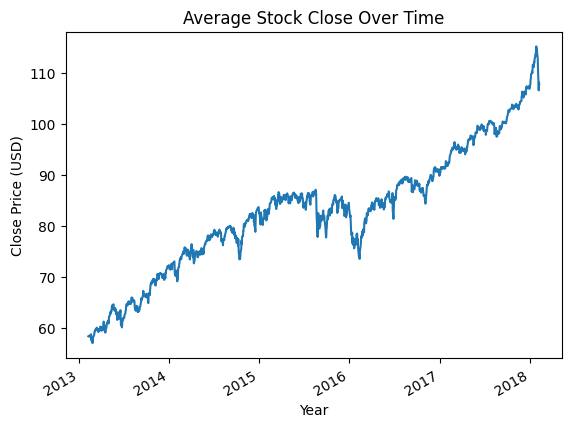

In [26]:
average_close = df.groupby('date')['close'].mean()
average_close.plot(kind='line', title='Average Stock Close Over Time', xlabel='Year', ylabel='Close Price (USD)')

The stock market has steadily risen, almost doubling in average value over the five years this graph shows.  The only period of extended decline was in late 2015.

<Axes: title={'center': 'Change in Average Stock Price Each Day'}, xlabel='Year', ylabel='Change in Stock Price (%)'>

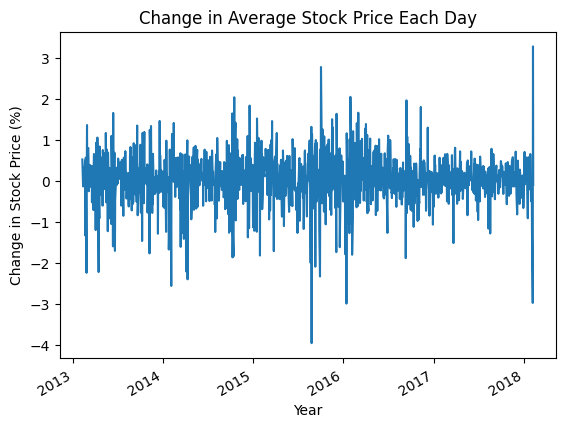

In [ ]:
average_open = df.groupby('date')['open'].mean()
average_change = average_close.divide(average_open)
average_change = average_change.subtract(1)
average_change = average_change.multiply(100)

average_change.plot(kind='line', title='Change in Average Stock Price Each Day', xlabel='Year', ylabel='Change in Stock Price (%)')

The stock market is very volatile day-to-day.  Even if the average is positive, some days lose one or two percent of value, while others gain.

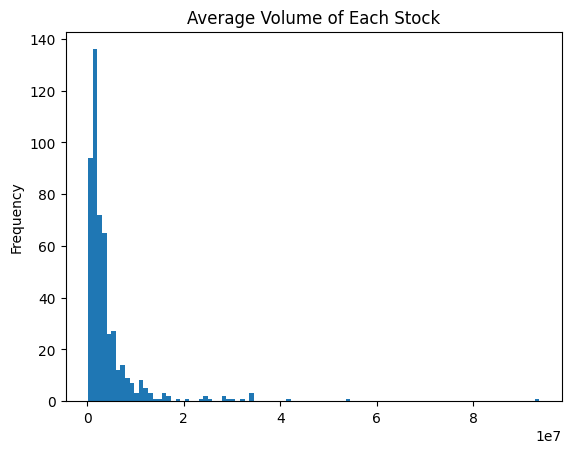

In [21]:
average_vol = df.groupby('Name')['volume'].mean()
plt.rcParams["axes.formatter.limits"] = (-5, 5)
hist = average_vol.plot(kind='hist', title='Average Volume of Each Stock', bins=98)


The grand majority of stocks average to not trading too many stocks compared to the few outliers there are.

<Axes: title={'center': 'Stock Close Price vs Volume'}, xlabel='volume', ylabel='close'>

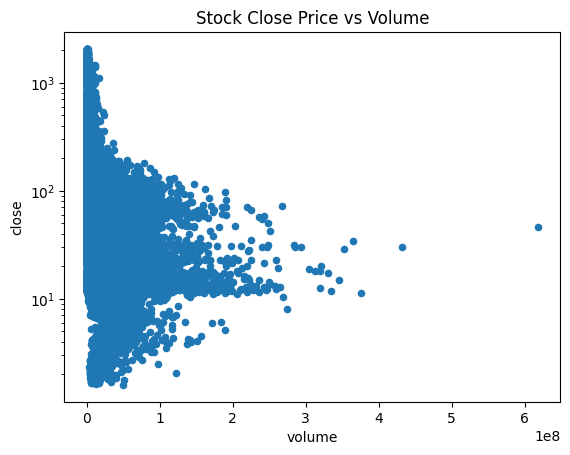

In [16]:
df.plot.scatter(x='volume', y='close', logy=True, title="Stock Close Price vs Volume")

Most of the high volume stocks have middling value.  This makes sense with the assumption that low-value stocks don't have the capital for high volume and high-value stocks are expensive to trade high volumes of.

<Axes: title={'center': 'Comparison of Stocks Over Time'}, xlabel='Year', ylabel='Close Price (USD)'>

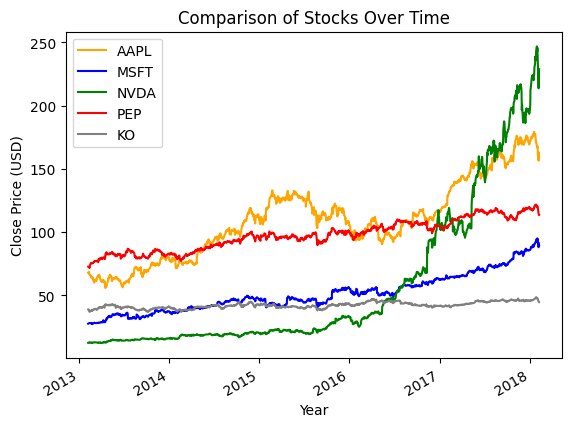

In [49]:
df_aapl = df[df['Name'] == 'AAPL']
df_msft = df[df['Name'] == 'MSFT']
# df_goog = df[df['Name'] == 'GOOG']
df_nvda = df[df['Name'] == 'NVDA']
df_pep = df[df['Name'] == 'PEP']
df_ko = df[df['Name'] == 'KO']
ax = df_aapl.plot(kind='line', x='date', y='close', xlabel='Year', ylabel='Close Price (USD)', label='AAPL', color='orange')
df_msft.plot(kind='line', x='date', y='close', xlabel='Year', ylabel='Close Price (USD)', label='MSFT', color='blue', ax=ax)
# df_goog.plot(kind='line', x='date', y='close', xlabel='Year', ylabel='Close Price (USD)', label='GOOG', color='red', ax=ax)
df_nvda.plot(kind='line', x='date', y='close', xlabel='Year', ylabel='Close Price (USD)', label='NVDA', color='green', ax=ax)
df_pep.plot(kind='line', x='date', y='close', xlabel='Year', ylabel='Close Price (USD)', label='PEP', color='red', ax=ax)
df_ko.plot(kind='line', x='date', y='close', xlabel='Year', title='Comparison of Stocks Over Time', ylabel='Close Price (USD)', label='KO', color='gray', ax=ax)

These five companies are some of the most valuable in the United States today.  While most have steadily risen over these five years, NVIDIA exploded in value starting in the second half of 2016.